# **IMPORT LIBRARY AND GETTING DATASETS**

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel
import random

In [29]:
data = pd.read_csv('https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# **Distribusi**

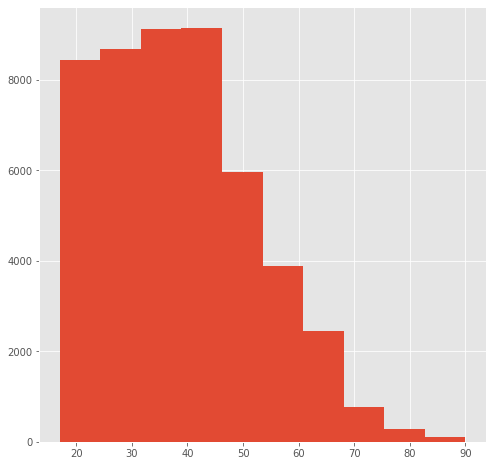

In [30]:
data['age'].hist(figsize=(8,8))
plt.show()

In [31]:
data[data['age']>70].shape

(868, 15)

# **Income**

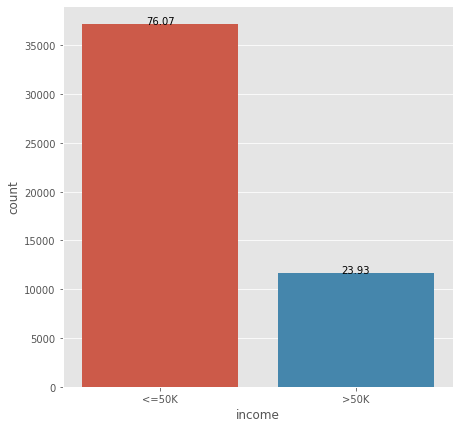

In [32]:
## splitting income with two condition 
## first chart is for <=50K income
## second chart is for >=50K income
plt.figure(figsize=(7,7))
tot = float(len(data))
##plotting seaborn
ax = sns.countplot(x='income', data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{:1.2f}'.format((height/tot)*100),
        ha='center')

# **Bivariate Analysis**

## **Boxplot**

Boxplotting dari umur dan pendapatan dari datasets yang digunakan.

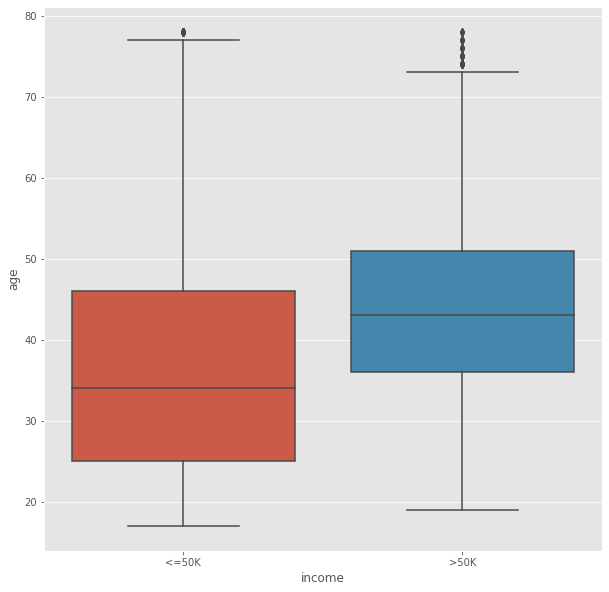

In [46]:
## Creating size of image (width, height)
fig = plt.figure(figsize=(10,10))
## seaborn plotting 'boxplot'
sns.boxplot(x='income', y='age', data=data)
plt.show()

## **Hipothesis Testing**

In [62]:
import random

data = data[(np.abs(stats.zscore(data['age'])) < 3 )]

income_1 = data[data['income'] == '<=50K']['age']
income_0 = data[data['income'] == '>50K']['age']

income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)

In [63]:
ttest, pval = ttest_ind(income_1, income_0, equal_var= False)
print('ttest', ttest)
print('pval', pval)

if pval < 0.05:
    print('Hipotesis Null ditolak')
else:
    print('Hipotesis Null diterima')

ttest -3.8513080926757004
pval 0.00016351916135684866
Hipotesis Null ditolak


# **TUGAS**
## SOAL
### 1. Buat dan Jelaskan Univariate Analysis (hours per week dan income)
### 2. Buat dan Jelaskan Bivariate Analysis (hours per week dan income)

# **UNIVARIATE ANALYSIS**

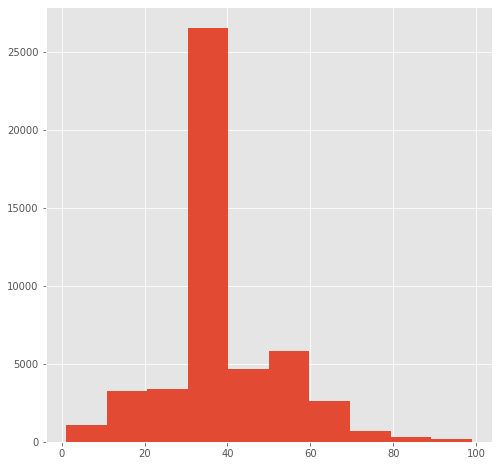

In [66]:
## HISTOGRAM HPW
data['hours-per-week'].hist(figsize=(8,8))
plt.show()

Terlihat dari histogram hours-per-week pada datasets sensus

In [77]:
## Showing Length from datasets with condition
data[data['hours-per-week']>50].shape

(5423, 15)

Untuk mendapatkan jumlah data dari 'hours-per-week' yang lebih besar dari 50 yaitu 5423 orang

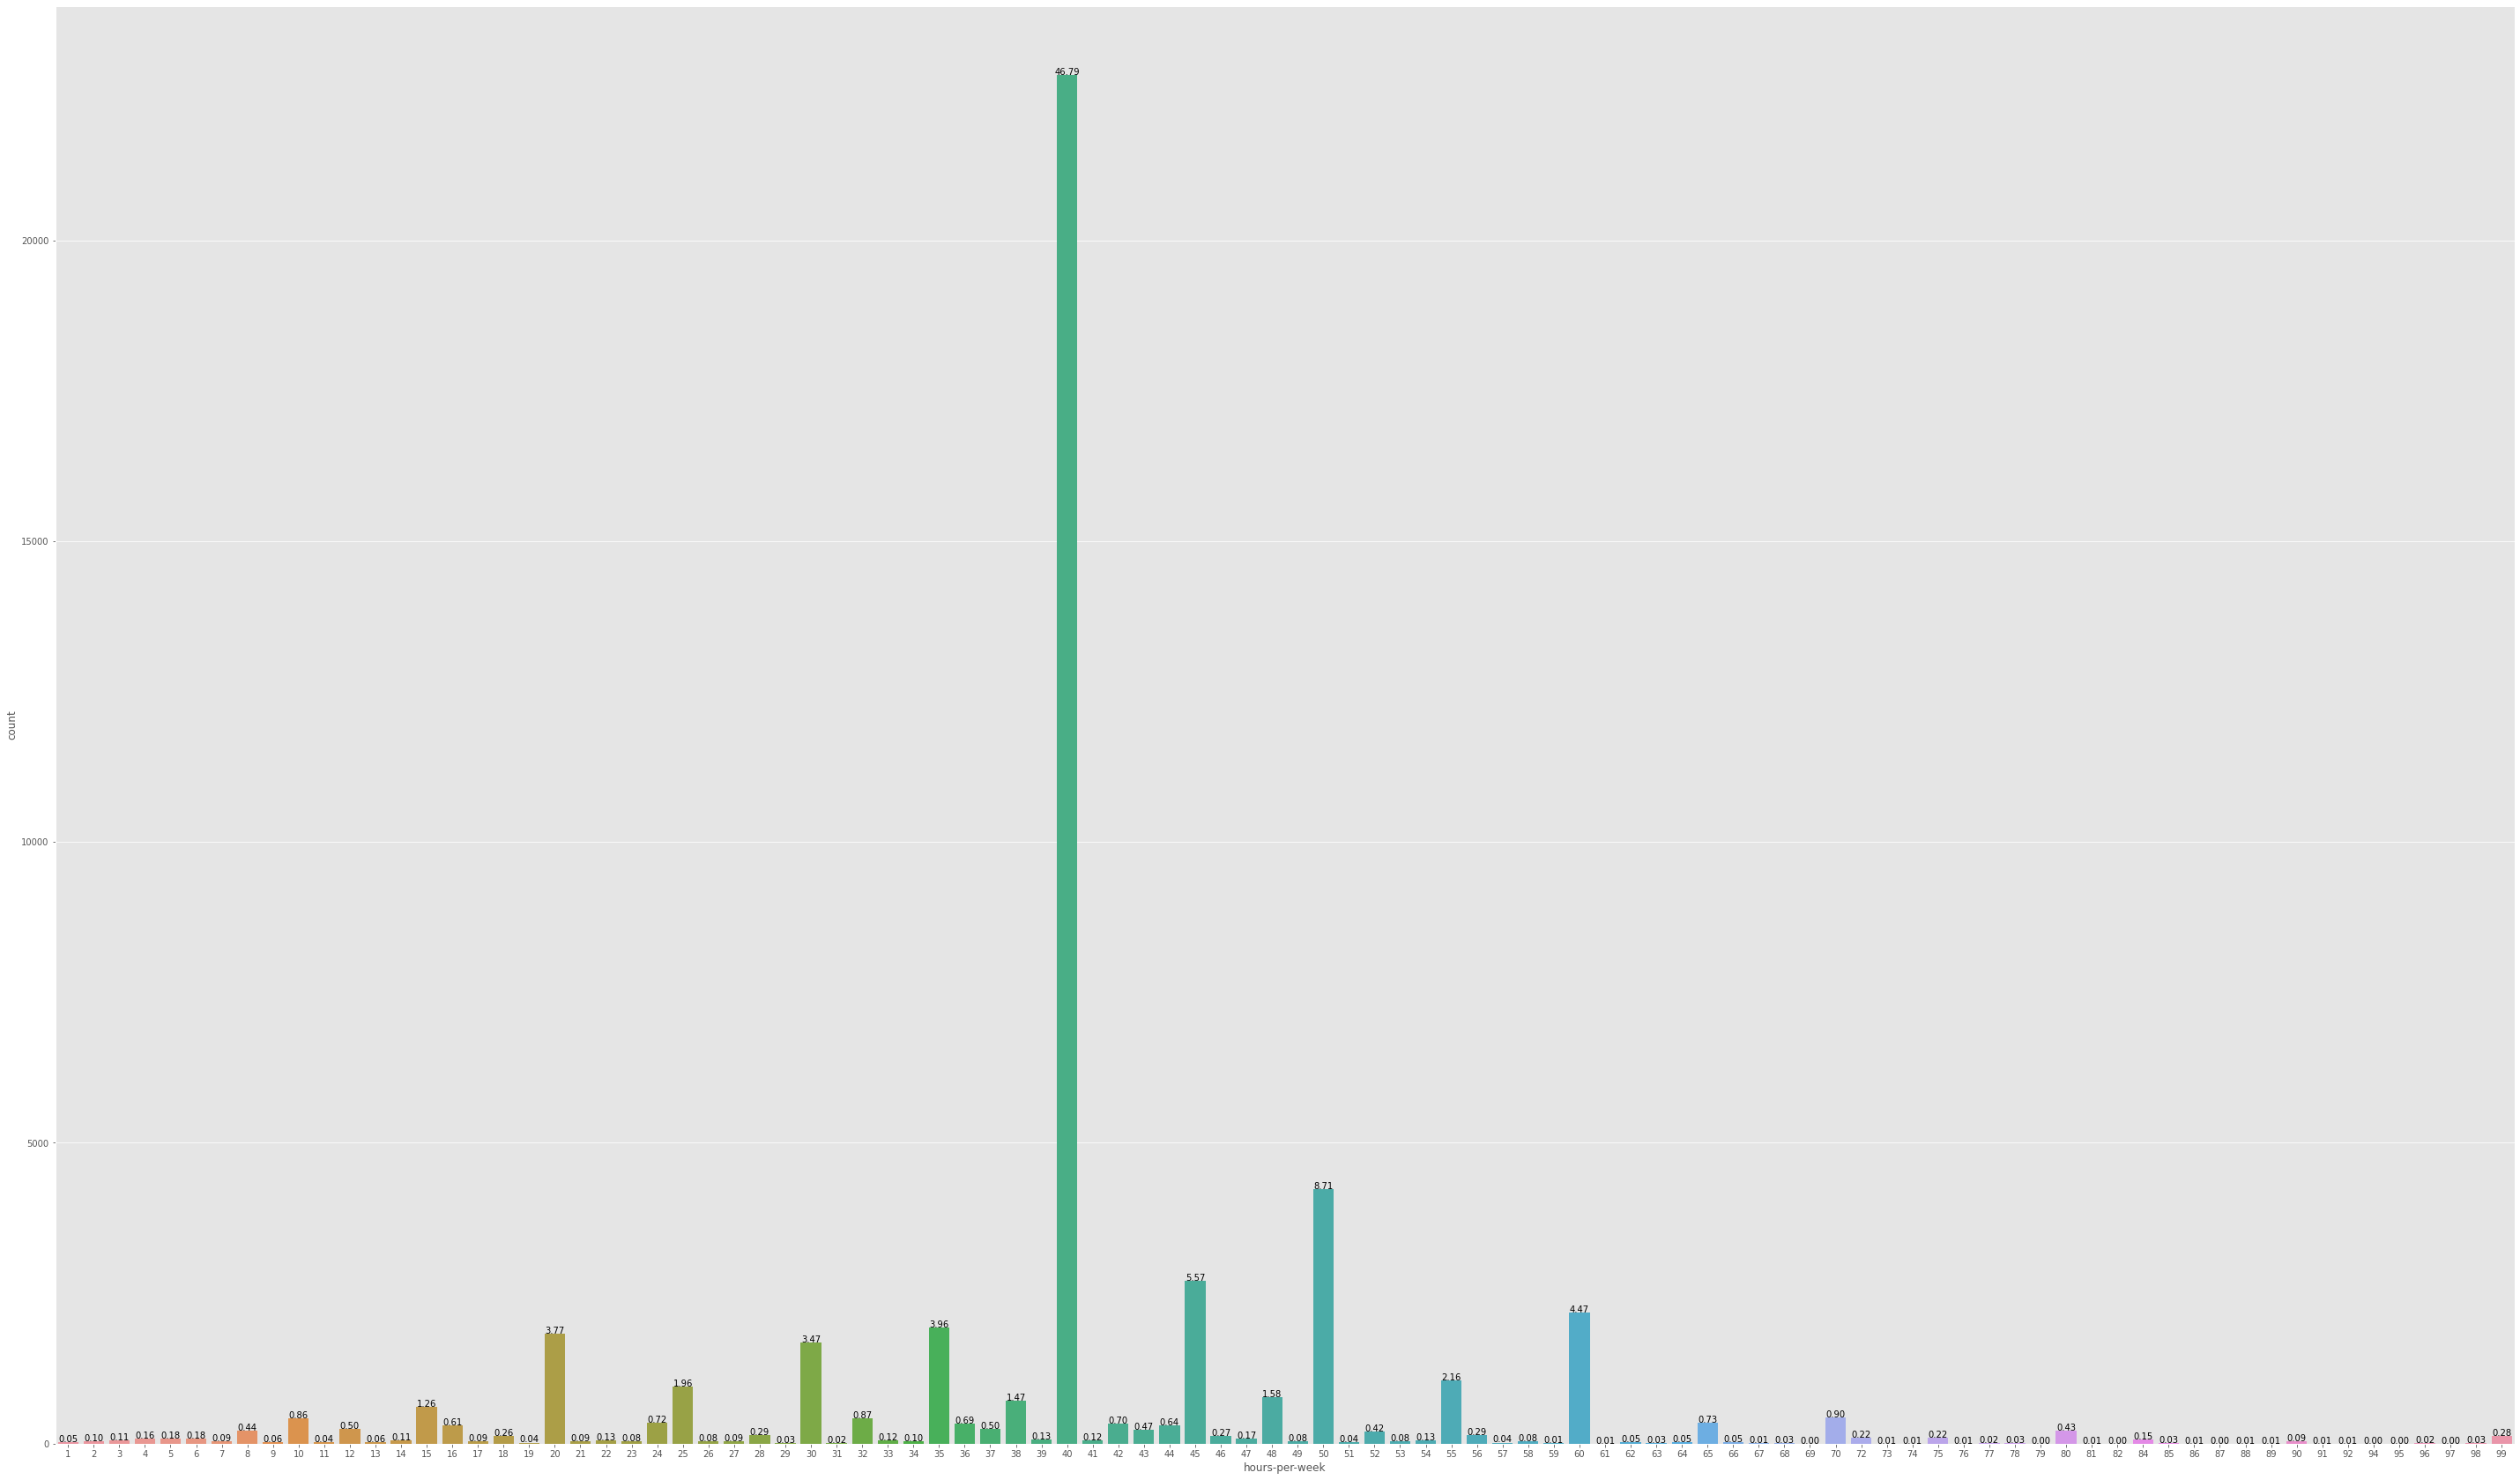

In [78]:
##Creating plotting from hours-per-week
plt.figure(figsize=(50,30))
tot = float(len(data))
##plotting seaborn
ax = sns.countplot(x='hours-per-week', data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{:1.2f}'.format((height/tot)*100),
        ha='center')

Disini terlihat bahwa Histogram dari hours-per-week

# **Bivariate Analysis HPW (Hours-Per-Week)**

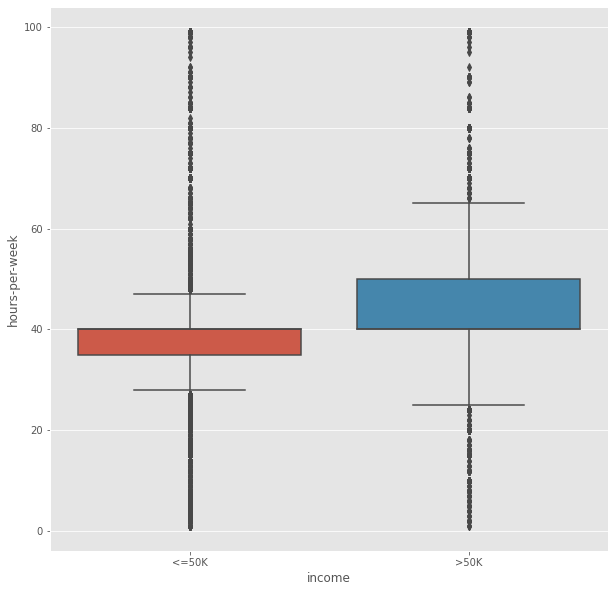

In [65]:
## Creating size of image (width, height)
fig = plt.figure(figsize=(10,10))
## seaborn plotting 'boxplot'
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.show()

In [79]:
data[['income', 'hours-per-week']].groupby(['income'],
    as_index=False).mean().sort_values(by='hours-per-week', ascending=False)

,income,hours-per-week
1,>50K,45.482702
0,<=50K,38.901344


Rata - Rata 'hours-per-week' untuk kelompok berpenghasilan <=50K itu ada di 45.50 jam dan untuk kelompok berpenghasilan >50K itu 38.90 jam


# **HIPOTHESIS TESTING NULL**

In [68]:
import random

data = data[(np.abs(stats.zscore(data['age'])) < 3 )]

income_1 = data[data['income'] == '<=50K']['hours-per-week']
income_0 = data[data['income'] == '>50K']['hours-per-week']

income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)

In [69]:
ttest, pval = ttest_ind(income_1, income_0, equal_var= False)
print('ttest', ttest)
print('pval', pval)

if pval < 0.05:
    print('Hipotesis Null ditolak')
else:
    print('Hipotesis Null diterima')

ttest -3.279975853633746
pval 0.0012276708174540404
Hipotesis Null ditolak


### Disini dapat terlihat hasil ttest dari income >50K dan <=50K itu bernilai -3.28
### dan hasil pval nya bernilai 0.0012
### dapat diambil kesimpulan **jika pval kurang dari 0.05** maka akan menolak hipotesis
### jika lebih maka akan menerima hipotesis